# Lending Club Case Study Notebook

## Goal

To minimize the risk of losing money while lending to customers, analyze the existing data to identify the variables that are strong indicators of loan default. 

## Context of Problem

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

## Target

Identify and Reduce risky loan applicants to cut down the amount of credit loss.

### Approach 

#### Step 1: Data Cleaning
#### Step 2: Univariate Analysis
#### Step 3: Segemented Univariate Analysis
#### Step 4: Bivaraiate/Multivariate Analysis
#### Step 5: Results

### Step 1: Data Cleaning

Loading Libraries.

In [1427]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Loading Input Data with configuring appropriate encoding and display setting.

In [1428]:
# Read the raw data. Use the dtype option to remove the warning for mixed types.
pd.options.display.max_columns = None
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style("whitegrid")
loan_raw = pd.read_csv('../datasets/loan.csv', dtype='unicode')
loan_raw.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              39717 non-null  object
 1    member_id                       39717 non-null  object
 2    loan_amnt                       39717 non-null  object
 3    funded_amnt                     39717 non-null  object
 4    funded_amnt_inv                 39717 non-null  object
 5    term                            39717 non-null  object
 6    int_rate                        39717 non-null  object
 7    installment                     39717 non-null  object
 8    grade                           39717 non-null  object
 9    sub_grade                       39717 non-null  object
 10   emp_title                       37258 non-null  object
 11   emp_length                      38642 non-null  object
 12   home_ownership                

Analyze the Input Data.

In [1429]:
# Analyze the raw data
print('Number of rows are: ', loan_raw.shape[0])
print('Number of cols are: ', loan_raw.shape[1])
print('Number of duplicated rows are: ', loan_raw.duplicated().sum())
print('Number of duplicated rows are: ', loan_raw)

Number of rows are:  39717
Number of cols are:  111
Number of duplicated rows are:  0
Number of duplicated rows are:              id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0      1077501   1296599      5000        5000            4975   36 months   
1      1077430   1314167      2500        2500            2500   60 months   
2      1077175   1313524      2400        2400            2400   36 months   
3      1076863   1277178     10000       10000           10000   36 months   
4      1075358   1311748      3000        3000            3000   60 months   
...        ...       ...       ...         ...             ...         ...   
39712    92187     92174      2500        2500            1075   36 months   
39713    90665     90607      8500        8500             875   36 months   
39714    90395     90390      5000        5000            1325   36 months   
39715    90376     89243      5000        5000             650   36 months   
39716    87023     86999

Determine the number and names of the columns with all null values. These columns should be dropped from analysis.

In [1430]:
# Number of columns with all values being null. These columns need to dropped from the dataframe
all_null_value_cols = [col for col in loan_raw.columns if loan_raw[col].isnull().all() == True]
print('Columns with all null values are:', all_null_value_cols)
print('Number of columns with all null values are: ', len(all_null_value_cols))

Columns with all null values are: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total

In [1431]:
# Drop the columns with all null values.
loan_raw.drop(all_null_value_cols, axis = 1, inplace = True)
print('Number of columns after dropping all null value columns are:', loan_raw.shape[1])

Number of columns after dropping all null value columns are: 57


Determine the number and names of the columns where null values are more than 50%. These columns should be dropped from analysis

In [1432]:
# Number of columns with majority (> 50%) of null values. These columns need to be dropped from the dataframe.
major_null_value_cols = [col for col in loan_raw.columns if loan_raw[col].isnull().sum() / loan_raw.shape[0] * 100 > 50]
print('Columns with more than 50% null values are:', major_null_value_cols)
print('Number of columns with more than 50% null values are: ', len(major_null_value_cols))

Columns with more than 50% null values are: ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
Number of columns with more than 50% null values are:  3


In [1433]:
# Drop the columns with majority of null values.
loan_raw.drop(major_null_value_cols, axis = 1, inplace = True)
print('Number of columns after dropping all columns with more than 50% null values:', loan_raw.shape[1])

Number of columns after dropping all columns with more than 50% null values: 54


Determine the number and names of the columns where there is single value across all the rows. These columns should be dropped from analysis

In [1434]:
# Number of columns with single values. These columns need to be dropped from the dataframe.
single_value_cols = [col for col in loan_raw.columns if loan_raw[col].nunique() == 1]
print('Columns with single values are:', single_value_cols)
print('Number of columns with single values are: ', len(single_value_cols))


Columns with single values are: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
Number of columns with single values are:  9


In [1435]:
# Drop the columns with single values.
loan_raw.drop(single_value_cols, axis = 1, inplace = True)
print('Number of columns after dropping all columns with single values:', loan_raw.shape[1])

Number of columns after dropping all columns with single values: 45


Analyze the columns that contain free textual content as these columns do not help deriving any insight. These columns should be dropped from analysis.

In [1436]:
# Drop the `desc` column as it has high value of nulls and is not to be considered for analysis. 
# The field is a textual field and will not help in initial analysis
unwanted_cols = ['desc']
loan_raw.drop(unwanted_cols, axis = 1, inplace = True)
print('Number of columns after dropping column with name desc:', loan_raw.shape[1])

Number of columns after dropping column with name desc: 44


In [1437]:
# Drop the column zip_code as it is a masked data and cannot be considered for analysis
unwanted_cols = ['zip_code']
loan_raw.drop(unwanted_cols, axis = 1, inplace = True)
print('Number of columns after dropping column with name zip_code:', loan_raw.shape[1])

Number of columns after dropping column with name zip_code: 43


Analyze the columns with unique identifiers like id's as these columns do not help deriving any insight. These columns should be dropped from analysis.

In [1438]:
# Drop the column containing unique identifiers for each loan entry.
# These field will not help in analysis.
unwanted_cols = ['id', 'member_id', 'url', 'emp_title', 'title']
loan_raw.drop(unwanted_cols, axis = 1, inplace = True)
print('Number of columns after dropping columns with name id, member_id, url, emp_title: ', loan_raw.shape[1])

Number of columns after dropping columns with name id, member_id, url, emp_title:  38


Impute the rows where `pub_rec_bankruptcies` is not available with 0. Contextually NaN means 0.

In [1439]:
# Impute the NaN rows for `pub_rec_bankruptcies` with 0 as NaN conveys the same information as 0 in this case
loan_raw.pub_rec_bankruptcies.fillna(0, inplace = True)

Drop rows where there is no data for 'emp_length', 'last_credit_pull_d', 'revol_util', 'last_pymnt_d'

In [1440]:
# Remove rows where 'emp_length', 'last_credit_pull_d', 'revol_util', 'last_pymnt_d' has NaN values
loan_raw.dropna(subset=['emp_length', 'last_credit_pull_d', 'revol_util', 'last_pymnt_d'], inplace = True)

Standardize Employment length in years to be integer. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [1441]:
# Remove year/years as suffix and symbol < as prefix 
loan_raw.emp_length = loan_raw.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0').replace('year','')).astype(int)

Standardize the columns with `%` as in `int_rate` and `revol_until` as columns with float values. This helps in performing mathematical operations over these columns.

In [1442]:
# Standardize values in the fields with `%`
loan_raw.int_rate = loan_raw.int_rate.apply(lambda x: float(x.replace('%', '')))
loan_raw.revol_util = loan_raw.revol_util.apply(lambda x: float(x.replace('%', '')))


Standardize columns which participate in numerical analysis to be of float types.

In [1443]:
# Convert the `loan_amnt`, `annual_inc`, `dti` to float
loan_raw.loan_amnt = loan_raw.loan_amnt.apply(lambda x: float(x))
loan_raw.annual_inc = loan_raw.annual_inc.apply(lambda x: float(x))
loan_raw.dti = loan_raw.dti.apply(lambda x: float(x))

Standardize columns which participate in categorical analysis to be of category types.

In [1444]:
loan_raw.purpose = loan_raw.purpose.astype('category')
loan_raw.home_ownership = loan_raw.home_ownership.astype('category')
loan_raw.verification_status = loan_raw.verification_status.astype('category')
loan_raw.term = loan_raw.term.astype('category')
loan_raw.grade = loan_raw.grade.astype('category')
loan_raw.sub_grade = loan_raw.sub_grade.astype('category')
loan_raw.addr_state = loan_raw.addr_state.astype('category')

Standardize columns with date context to be of standard date time format and extract year and months.

In [1445]:
loan_raw.issue_d = pd.to_datetime(loan_raw.issue_d,format='%b-%y')
loan_raw['issue_year'] = pd.to_datetime(loan_raw.issue_d,format='%b-%y').dt.year
loan_raw['issue_month'] = pd.to_datetime(loan_raw.issue_d,format='%b-%y').dt.month

Remove data where the `loan_status` is not Current as this data pertains to ongoing loans and hence with indeterministic last state.

In [1446]:
# Studying the pattern of loans defaulted can only be done by comparing completed and defaulted loans.
loan_raw = loan_raw[loan_raw.loan_status != "Current"]
loan_raw.loan_status.value_counts

<bound method IndexOpsMixin.value_counts of 0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 37433, dtype: object>

Function to remove outliers from a given column from the given dataframe. 

The function removes the rows from the dataframe where the values from the target columns are beyond the higher/lower fence for that column.

In [1447]:
def remove_outlier(input_df, col_name):
    q1 = input_df[col_name].quantile(0.25)
    q3 = input_df[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - (1.5 * iqr)
    fence_high = q3 + (1.5 * iqr)
    
    before_count = len(input_df)
    output_df = input_df.loc[(input_df[col_name] > fence_low) & (input_df[col_name] < fence_high)]
    after_count = len(output_df)
    
    num_entries_removed = before_count - after_count
    return output_df, num_entries_removed

Remove outliers from `loan_amnt`, `int_rate`, `annual_inc` and `dti` columns. Use the `remove_outlier` method declared above to remove the outliers.

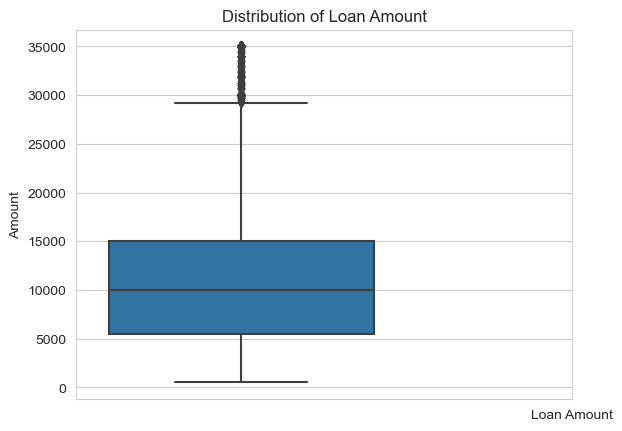

In [1448]:
# Distribution of the `loan_amnt` column post outlier removal
sns.boxplot([loan_raw.loan_amnt])
plt.title('Distribution of Loan Amount')
plt.ylabel('Amount')
plt.xticks([1],['Loan Amount'])
plt.show()

In [1449]:
loan_raw, num_entries_removed = remove_outlier(loan_raw, 'loan_amnt')
print('Number of outliers removed for loan_amnt:', num_entries_removed)

Number of outliers removed for loan_amnt: 1076


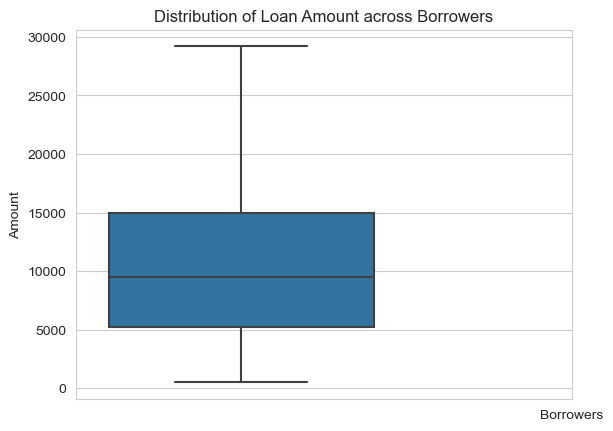

In [1450]:
# Distribution of the `loan_amnt` column post outlier removal
sns.boxplot([loan_raw.loan_amnt])
plt.title('Distribution of Loan Amount across Borrowers')
plt.ylabel('Amount')
plt.xticks([1],['Borrowers'])
plt.show()

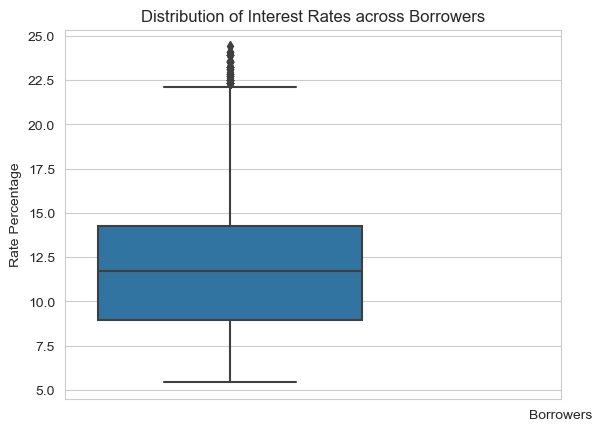

In [1451]:
sns.boxplot([loan_raw.int_rate])
plt.title('Distribution of Interest Rates across Borrowers')
plt.ylabel('Rate Percentage')
plt.xticks([1],['Borrowers'])
plt.show()

In [1452]:
loan_raw, num_entries_removed = remove_outlier(loan_raw, 'int_rate')
print('Number of outliers removed for int_rate:', num_entries_removed)

Number of outliers removed for int_rate: 66


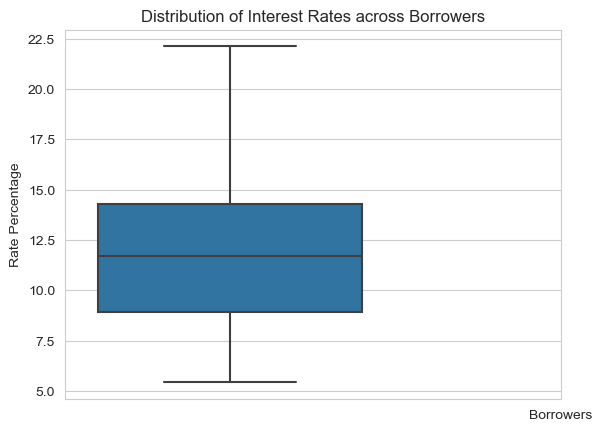

In [1453]:
sns.boxplot([loan_raw.int_rate])
plt.title('Distribution of Interest Rates across Borrowers')
plt.ylabel('Rate Percentage')
plt.xticks([1],['Borrowers'])
plt.show()

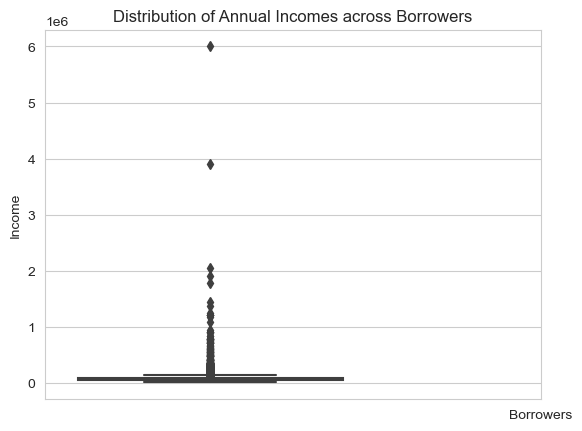

In [1454]:
sns.boxplot([loan_raw.annual_inc])
plt.title('Distribution of Annual Incomes across Borrowers')
plt.ylabel('Income')
plt.xticks([1],['Borrowers'])
plt.show()

In [1455]:
loan_raw, num_entries_removed = remove_outlier(loan_raw, 'annual_inc')
print('Number of outliers removed for annual_inc:', num_entries_removed)

Number of outliers removed for annual_inc: 1781


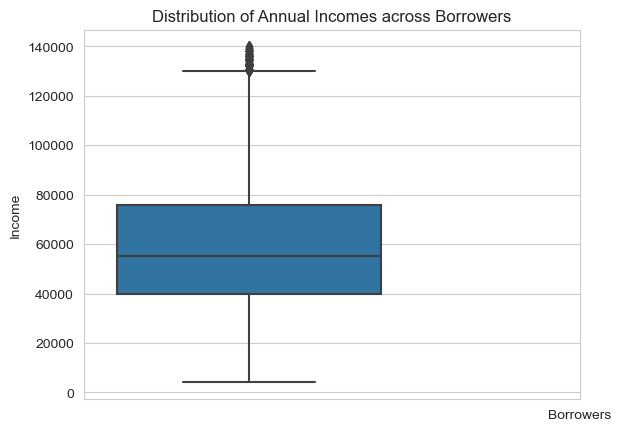

In [1456]:
sns.boxplot([loan_raw.annual_inc])
plt.title('Distribution of Annual Incomes across Borrowers')
plt.ylabel('Income')
plt.xticks([1],['Borrowers'])
plt.show()

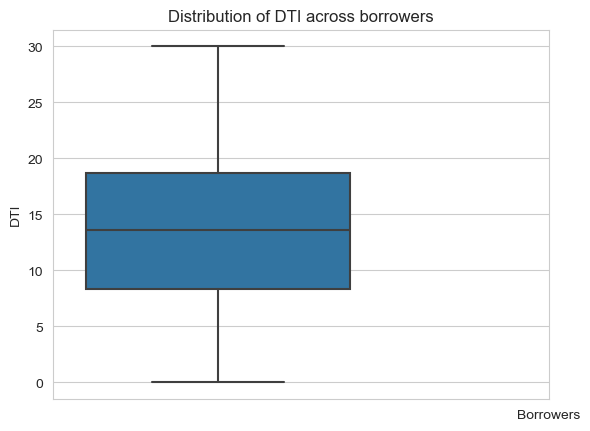

In [1457]:
sns.boxplot([loan_raw.dti])
plt.title('Distribution of DTI across borrowers')
plt.ylabel('DTI')
plt.xticks([1],['Borrowers'])
plt.show()

### Step 2: Univariate Analysis

purpose
debt_consolidation    47.250072
credit_card           13.135323
other                 10.060852
home_improvement       6.870472
major_purchase         5.609968
small_business         4.308896
car                    4.027818
wedding                2.494929
medical                1.764706
moving                 1.503912
vacation               0.967835
house                  0.895393
educational            0.869313
renewable_energy       0.240510
Name: count, dtype: float64


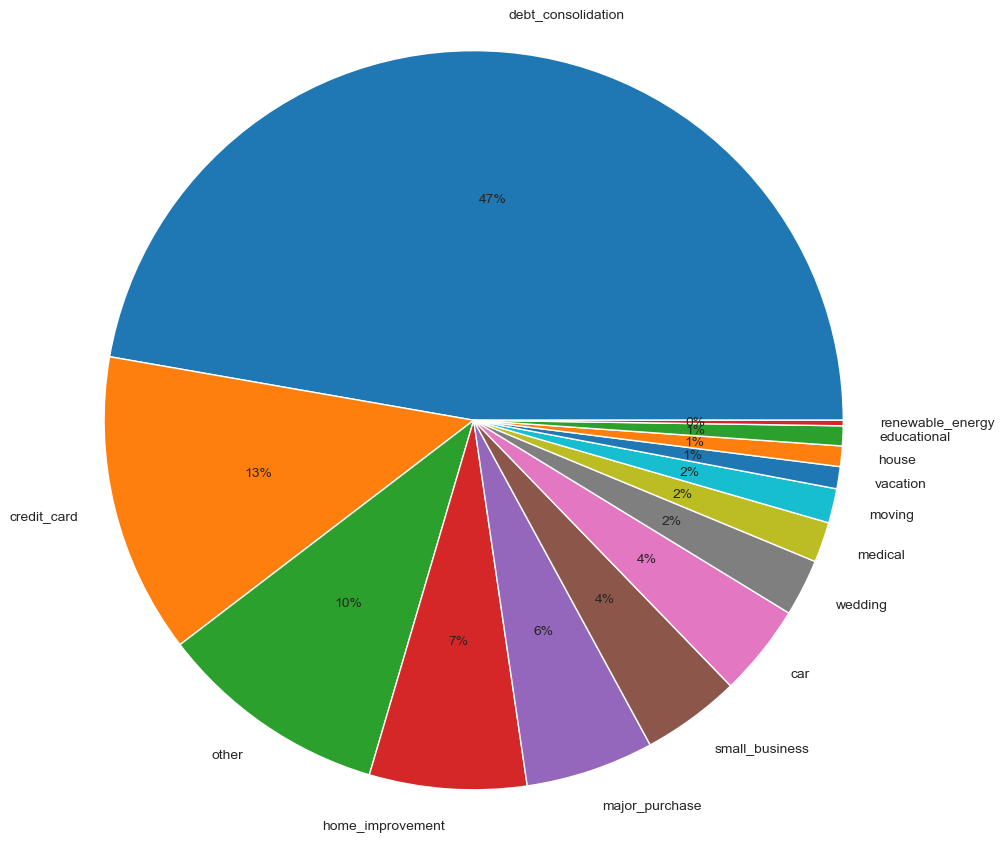

In [1458]:
purpose_distribution = loan_raw.purpose.value_counts()
print( purpose_distribution / loan_raw.shape[0] * 100)
plt.figure(figsize=(6,6))
plt.pie(purpose_distribution,labels = purpose_distribution.index, autopct='%1.0f%%', radius = 2)
plt.show()

Inference: **Almost half** of the applicants have taken loan to with the purpose of **debt_consolidation**

loan_status
Fully Paid     85.914228
Charged Off    14.085772
Name: count, dtype: float64


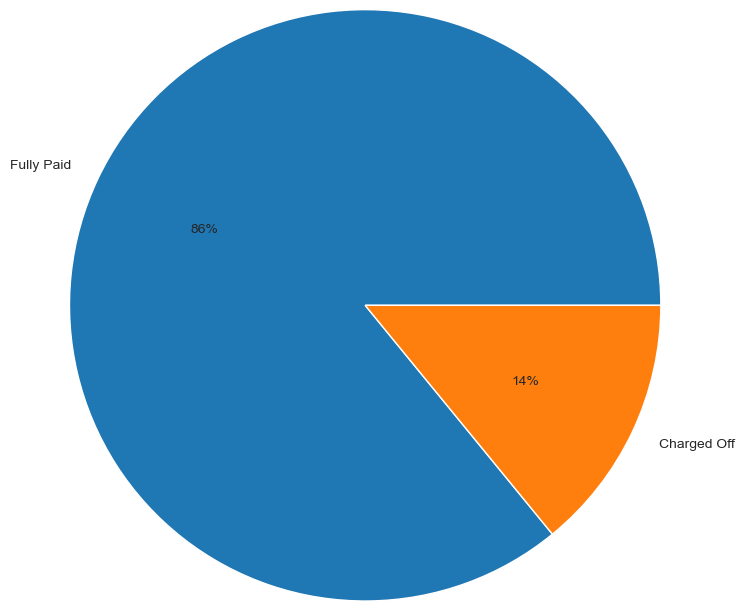

In [1459]:
loan_status_distribution = loan_raw.loan_status.value_counts()
print( loan_status_distribution / loan_raw.shape[0] * 100)
plt.pie(loan_status_distribution,labels = loan_status_distribution.index, autopct='%1.0f%%', radius = 2)
plt.show()

Inference: There are around **15%** of the loans getting defaulted.

home_ownership
RENT        50.017386
MORTGAGE    42.248624
OWN          7.464503
OTHER        0.260794
NONE         0.008693
Name: count, dtype: float64


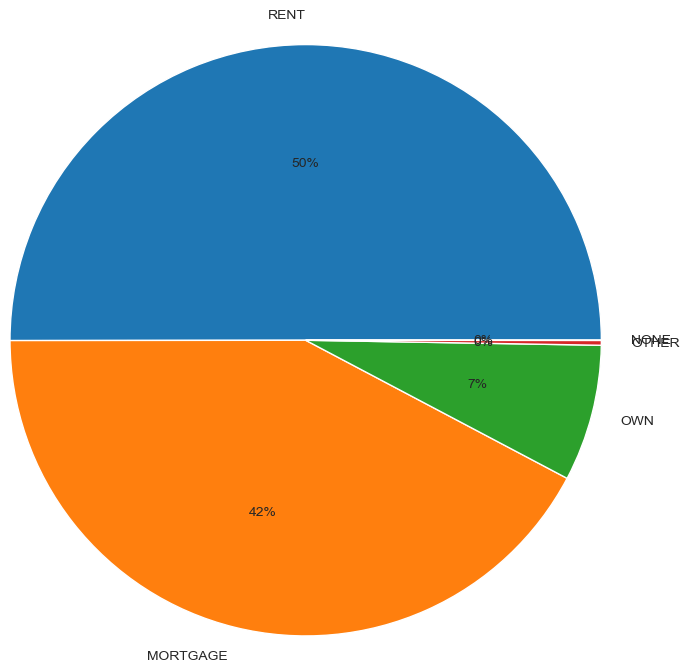

In [1460]:
home_ownership_distribution = loan_raw.home_ownership.value_counts()
print(home_ownership_distribution / loan_raw.shape[0] * 100)
plt.pie(home_ownership_distribution,labels = home_ownership_distribution.index, autopct='%1.0f%%', radius = 2)
plt.show()

Inference: 
 - **Almost half** of the loan applicants are staying in a rented accomodation. 
 - **Majority** of the loan applicants that are not staying in rented accomodation have morgaged accomodation.  

verification_status
Not Verified       45.659229
Verified           28.866995
Source Verified    25.473776
Name: count, dtype: float64


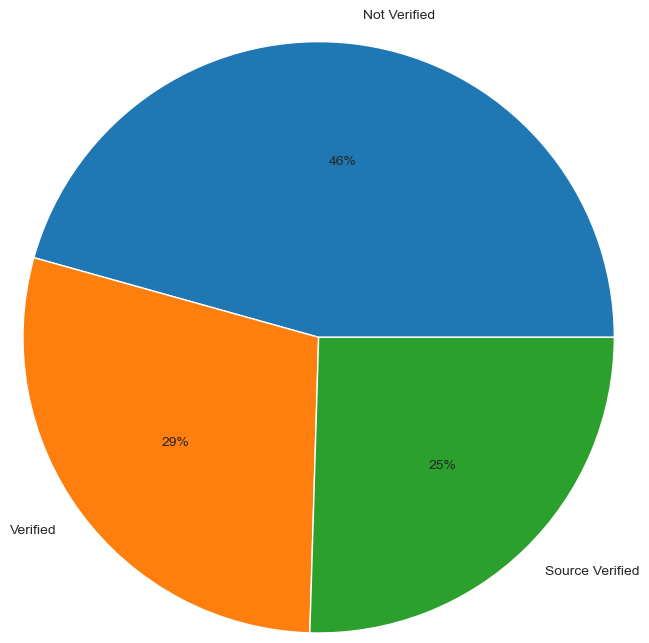

In [1461]:
verification_status_distribution = loan_raw.verification_status.value_counts()
print(verification_status_distribution / loan_raw.shape[0] * 100)
plt.pie(verification_status_distribution,labels = verification_status_distribution.index, autopct='%1.0f%%', radius = 2)
plt.show()

Inference: There is a considerable percentage **46%** of loan applicants where the income is not verified by LC.

term
 36 months    76.858881
 60 months    23.141119
Name: count, dtype: float64


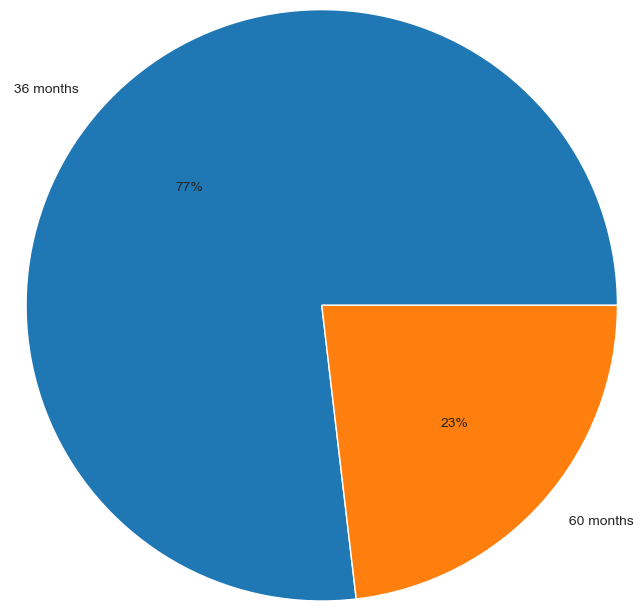

In [1462]:
loan_term_distribution = loan_raw.term.value_counts()
print(loan_term_distribution / loan_raw.shape[0] * 100)
plt.pie(loan_term_distribution,labels = loan_term_distribution.index, autopct='%1.0f%%', radius = 2)
plt.show()

Inference: A majority **(77%)** of the loans are taken with a tenure of **36 months**

emp_length
10    21.663286
0     12.248624
2     11.648797
3     10.814257
4      9.006085
1      8.623587
5      8.542451
6      5.830194
7      4.613156
8      3.743842
9      3.265720
Name: count, dtype: float64


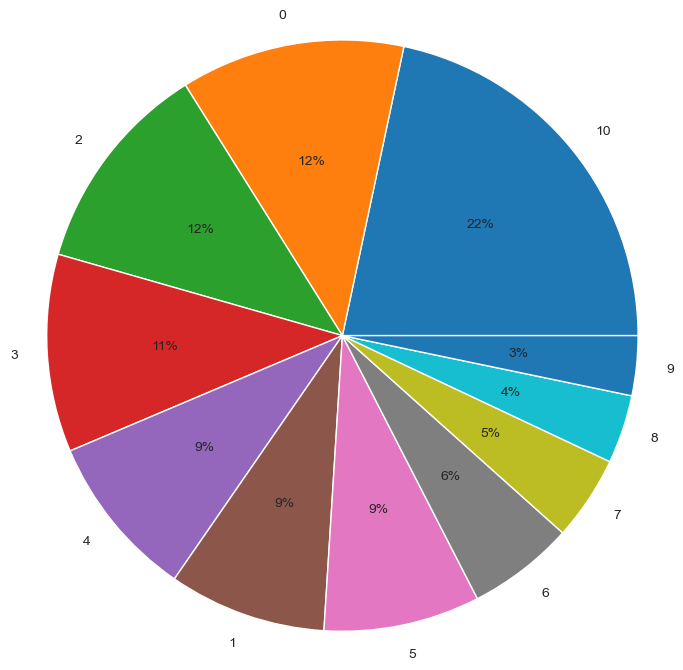

In [1463]:
emp_length_distribution = loan_raw.emp_length.value_counts()
print(emp_length_distribution / loan_raw.shape[0] * 100)
plt.pie(emp_length_distribution,labels = emp_length_distribution.index, autopct='%1.0f%%', radius = 2)
plt.show()

Inference: Applicants with employment length of **10 or more years** constitues 1/5th of all the borrowers.

pub_rec_bankruptcies
0    93.851058
1     4.230658
0     1.903796
2     0.014489
Name: count, dtype: float64


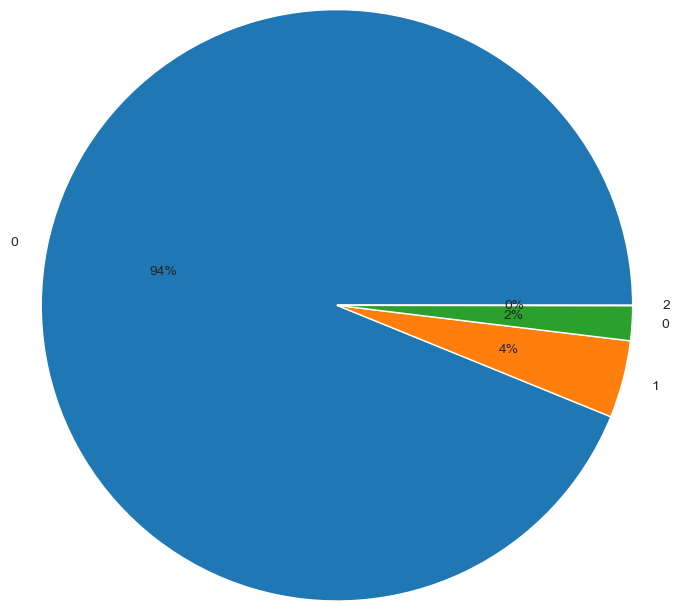

In [1464]:
pub_rec_bankruptcies_distribution = loan_raw.pub_rec_bankruptcies.value_counts()
print(pub_rec_bankruptcies_distribution / loan_raw.shape[0] * 100)
plt.pie(pub_rec_bankruptcies_distribution,labels = pub_rec_bankruptcies_distribution.index, autopct='%1.0f%%', radius = 2)
plt.show()

Inference: Around **6%** of the borrowers have declared more than 1 bankruptcies.

In [1493]:
loan_raw.describe()

,loan_amnt,int_rate,emp_length,annual_inc,issue_d,dti,revol_util,issue_year,issue_month
count,34510.000000,34510.000000,34510.000000,34510.000000,34510,34510.000000,34510.000000,34510.000000,34510.000000
mean,10215.606346,11.801630,4.863489,60318.100875,2010-10-14 13:05:50.715734528,13.449772,48.710932,2010.280296,7.083802
min,500.000000,5.420000,0.000000,4000.000000,2007-06-01 00:00:00,0.000000,0.000000,2007.000000,1.000000
25%,5000.000000,8.900000,2.000000,40000.000000,2010-04-01 00:00:00,8.360000,25.400000,2010.000000,4.000000
50%,9000.000000,11.710000,4.000000,55200.000000,2011-01-01 00:00:00,13.570000,49.100000,2011.000000,7.000000
75%,14168.750000,14.260000,8.000000,76000.000000,2011-07-01 00:00:00,18.700000,72.100000,2011.000000,10.000000
max,29175.000000,22.110000,10.000000,139992.000000,2011-12-01 00:00:00,29.990000,99.900000,2011.000000,12.000000
std,6236.545181,3.572491,3.537342,26856.086511,NaN,6.649895,28.233484,0.892067,3.421400


In [1509]:
loan_raw['loan_status_enum'] = loan_raw['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [1511]:
loan_raw.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,loan_status_enum
0,5000.0,5000,4975,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,2011,12,0
1,2500.0,2500,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,2011,12,1
2,2400.0,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,2011,12,0
3,10000.0,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,2011,12,0
5,5000.0,5000,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0,0,5632.21,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,0,2011,12,0


In [1521]:
loan_raw.corr(numeric_only=True)

,loan_amnt,int_rate,emp_length,annual_inc,dti,revol_util,issue_year,issue_month,loan_status_enum
loan_amnt,1.000000,0.246791,0.135607,0.366541,0.091544,0.073252,0.059127,0.037947,0.054580
int_rate,0.246791,1.000000,-0.013784,0.020506,0.109208,0.470854,0.017054,0.020640,0.204951
emp_length,0.135607,-0.013784,1.000000,0.190602,0.056277,0.008738,0.114418,0.019631,0.017039
annual_inc,0.366541,0.020506,0.190602,1.000000,-0.080267,0.040569,0.025223,0.006723,-0.069962
dti,0.091544,0.109208,0.056277,-0.080267,1.000000,0.276158,0.092652,0.013851,0.039163
revol_util,0.073252,0.470854,0.008738,0.040569,0.276158,1.000000,0.066232,0.049725,0.097710
issue_year,0.059127,0.017054,0.114418,0.025223,0.092652,0.066232,1.000000,-0.038610,0.019001
issue_month,0.037947,0.020640,0.019631,0.006723,0.013851,0.049725,-0.038610,1.000000,0.024605
loan_status_enum,0.054580,0.204951,0.017039,-0.069962,0.039163,0.097710,0.019001,0.024605,1.000000


In [1506]:
loan_data_fully_paid = loan_raw[loan_raw['loan_status'] == 'Fully Paid']
loan_data_fully_paid = loan_data_fully_paid[['loan_amnt', 'annual_inc', 'dti', 'pub_rec_bankruptcies']]
loan_data_fully_paid.corr()
# ['loan_amnt', 'int_rate', 'dti']][]
# loan_data_charged_off = loan_raw[['loan_amnt', 'int_rate', 'dti']]
# loan_data_charged_off.corr()

,loan_amnt,annual_inc,dti,pub_rec_bankruptcies
loan_amnt,1.000000,0.368798,0.090706,-0.027618
annual_inc,0.368798,1.000000,-0.085031,0.004554
dti,0.090706,-0.085031,1.000000,0.000570
pub_rec_bankruptcies,-0.027618,0.004554,0.000570,1.000000


In [1507]:
loan_data_charged_off = loan_raw[loan_raw['loan_status'] == 'Charged Off']
loan_data_charged_off = loan_data_charged_off[['loan_amnt', 'annual_inc', 'dti', 'pub_rec_bankruptcies']]
loan_data_charged_off.corr()

,loan_amnt,annual_inc,dti,pub_rec_bankruptcies
loan_amnt,1.000000,0.393077,0.083698,-0.004634
annual_inc,0.393077,1.000000,-0.030256,0.049723
dti,0.083698,-0.030256,1.000000,0.019961
pub_rec_bankruptcies,-0.004634,0.049723,0.019961,1.000000


### Step 3: Segmented Univariate Analysis

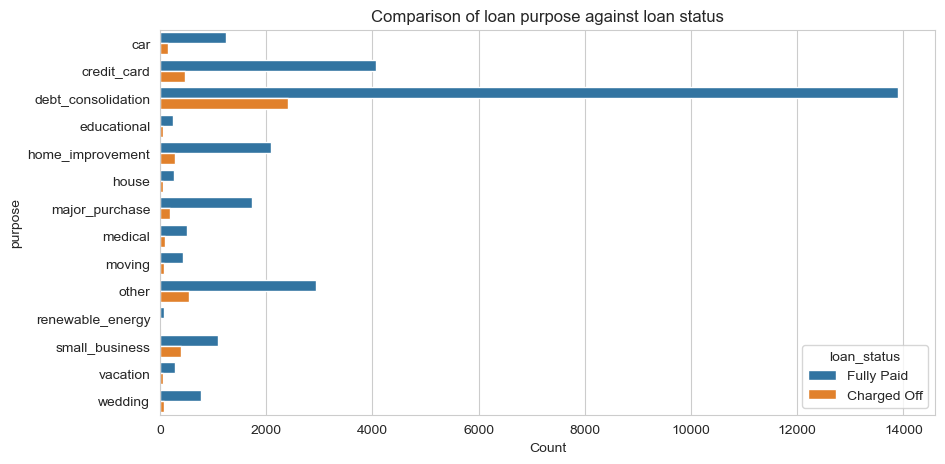

In [1471]:
plt.figure(figsize=(10,5))
sns.countplot(data = loan_raw, y = 'purpose', hue = 'loan_status')
plt.xlabel('Count')
plt.title('Comparison of loan purpose against loan status',fontsize=12)
plt.show()

Inference: Not much can be derived here as "Charged Off" loans tend to follow the same trend across different purpose groups as "Fully Paid".

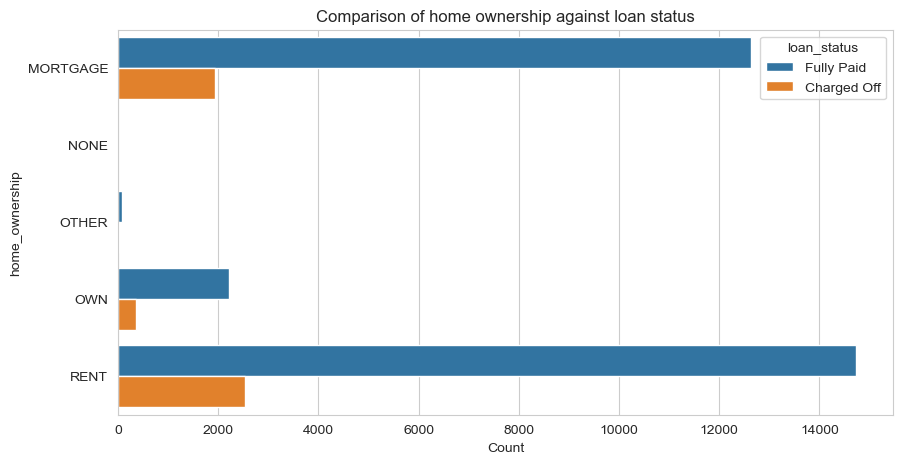

In [1472]:
plt.figure(figsize=(10,5))
sns.countplot(data = loan_raw, y = 'home_ownership', hue = 'loan_status')
plt.xlabel('Count')
plt.title('Comparison of home ownership against loan status',fontsize=12)
plt.show()

Inference: Not much can be derived here as "Charged Off" loans tend to follow the same trend across different purpose groups as "Fully Paid".

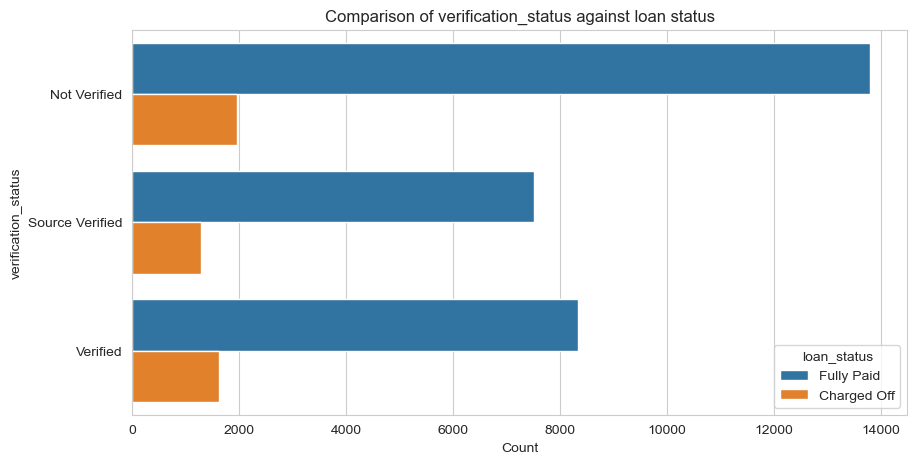

In [1473]:
plt.figure(figsize=(10,5))
sns.countplot(data = loan_raw, y = 'verification_status', hue = 'loan_status')
plt.xlabel('Count')
plt.title('Comparison of verification_status against loan status',fontsize=12)
plt.show()

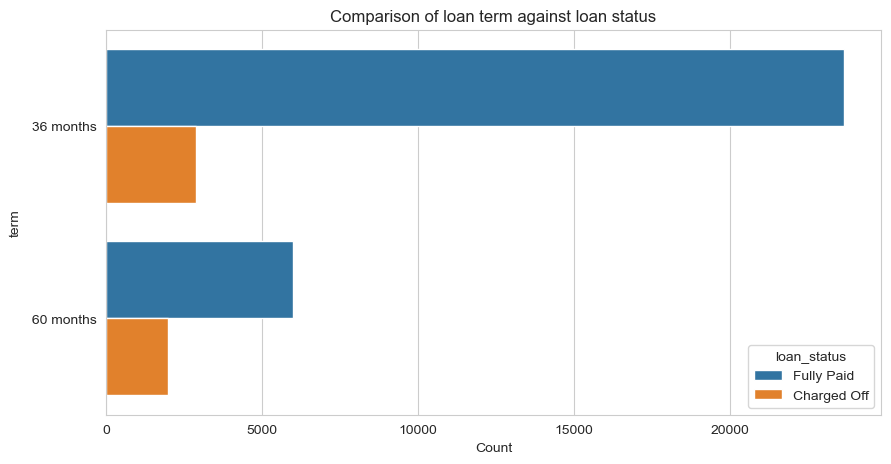

In [1474]:
plt.figure(figsize=(10,5))
sns.countplot(data = loan_raw, y = 'term', hue = 'loan_status')
plt.xlabel('Count')
plt.title('Comparison of loan term against loan status',fontsize=12)
plt.show()

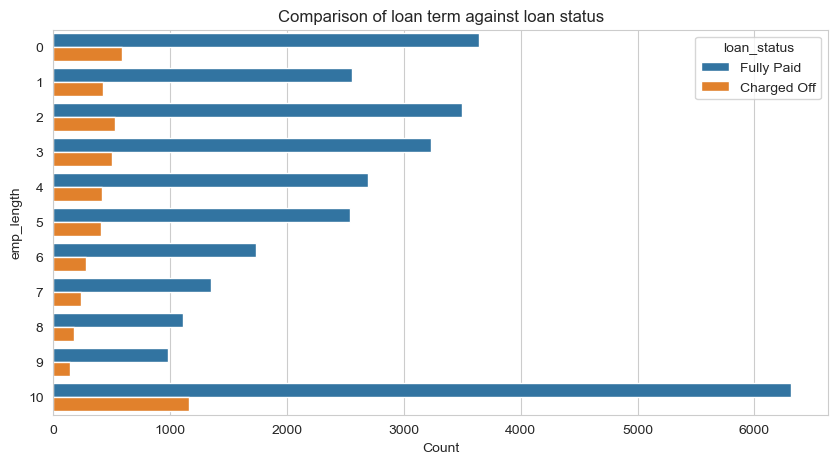

In [1475]:
plt.figure(figsize=(10,5))
sns.countplot(data = loan_raw, y = 'emp_length', hue = 'loan_status')
plt.xlabel('Count')
plt.title('Comparison of loan term against loan status',fontsize=12)
plt.show()

In [1641]:
round(loan_raw[loan_raw.loan_status == 'Charged Off'].shape[0] / loan_raw.shape[0] * 100, 2)

14.09

In [1647]:
charged_off_loan_percentage = round(loan_raw[loan_raw.loan_status == 'Charged Off'].shape[0] / loan_raw.shape[0] * 100, 2)

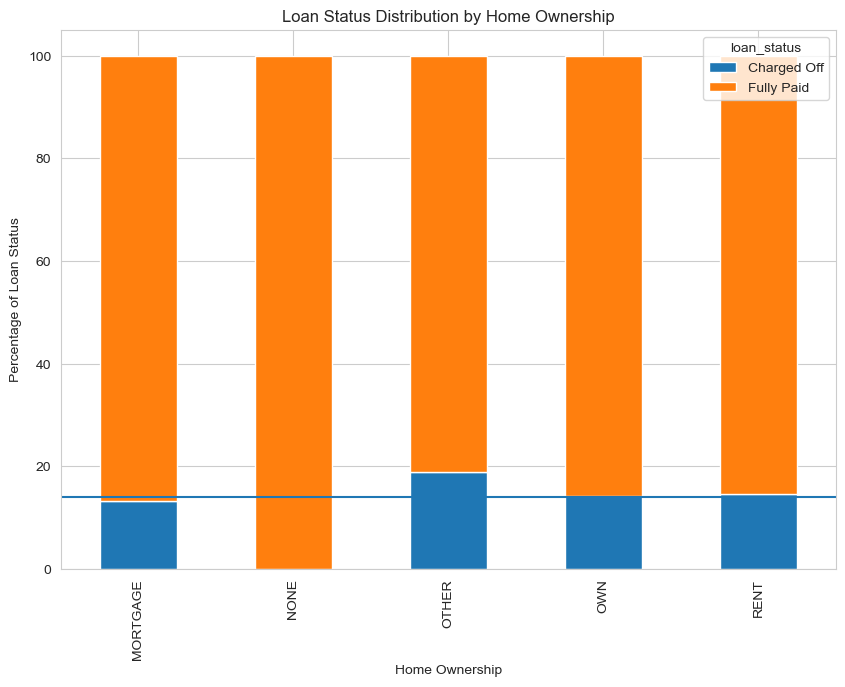

In [1645]:
groupedby_homeownership = loan_raw[['home_ownership','loan_status']].groupby("home_ownership")["loan_status"].value_counts(normalize = True).mul(100).unstack()
groupedby_term = loan_raw[['home_ownership','loan_status']].groupby("home_ownership")["loan_status"].value_counts(normalize = True).mul(100)
ax = groupedby_homeownership.plot(kind='bar', stacked=True, figsize=(10, 7))

ax.set_xlabel('Home Ownership')
ax.set_ylabel('Percentage of Loan Status')
ax.set_title('Loan Status Distribution by Home Ownership')

ax.axhline(y = charged_off_loan_percentage, color='red')

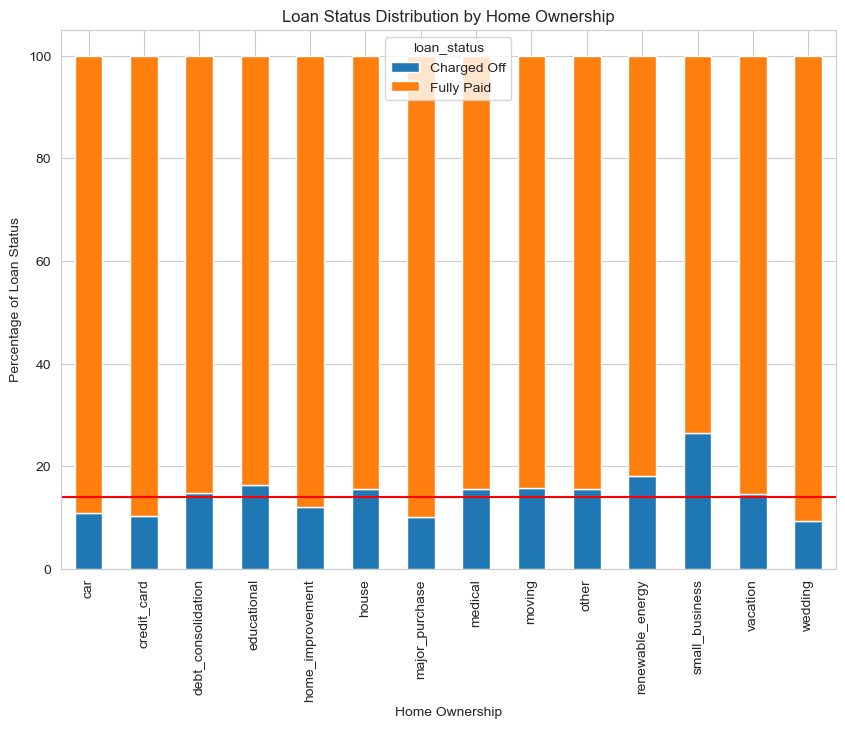

In [1648]:
groupedby_homeownership = loan_raw[['purpose','loan_status']].groupby("purpose")["loan_status"].value_counts(normalize = True).mul(100).unstack()
groupedby_term = loan_raw[['purpose','loan_status']].groupby("purpose")["loan_status"].value_counts(normalize = True).mul(100)
ax = groupedby_homeownership.plot(kind='bar', stacked=True, figsize=(10, 7))

ax.set_xlabel('Home Ownership')
ax.set_ylabel('Percentage of Loan Status')
ax.set_title('Loan Status Distribution by Home Ownership')

ax.axhline(y = charged_off_loan_percentage, color='red')

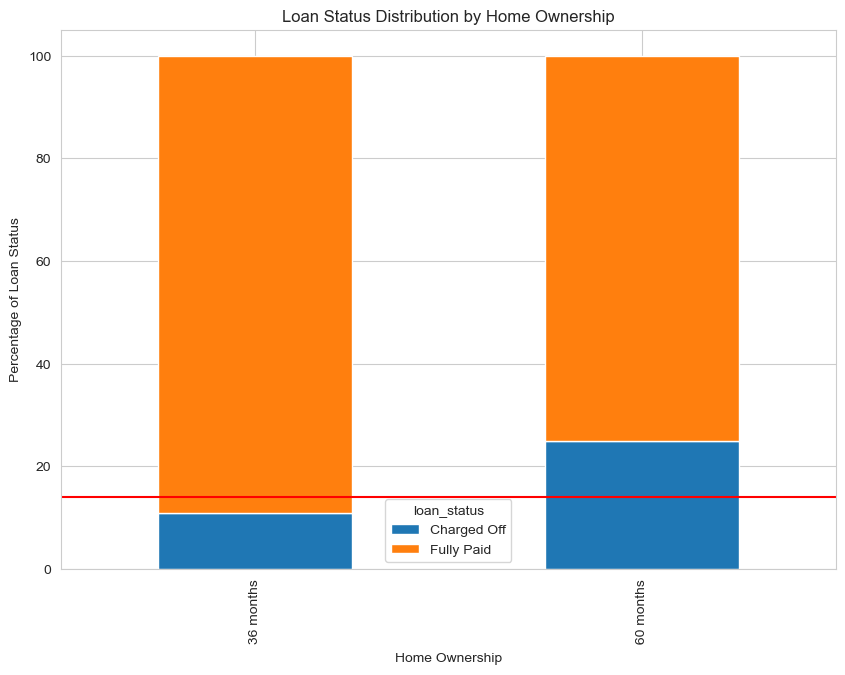

In [1649]:
groupedby_homeownership = loan_raw[['term','loan_status']].groupby("term")["loan_status"].value_counts(normalize = True).mul(100).unstack()
groupedby_term = loan_raw[['term','loan_status']].groupby("term")["loan_status"].value_counts(normalize = True).mul(100)
ax = groupedby_homeownership.plot(kind='bar', stacked=True, figsize=(10, 7))

ax.set_xlabel('Home Ownership')
ax.set_ylabel('Percentage of Loan Status')
ax.set_title('Loan Status Distribution by Home Ownership')

ax.axhline(y = charged_off_loan_percentage, color='red')

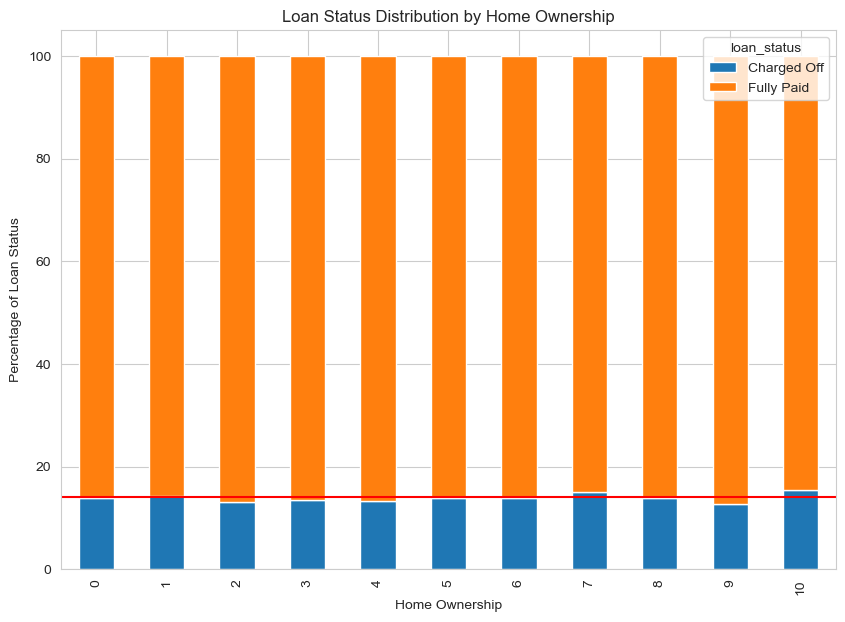

In [1650]:
groupedby_homeownership = loan_raw[['emp_length','loan_status']].groupby("emp_length")["loan_status"].value_counts(normalize = True).mul(100).unstack()
groupedby_term = loan_raw[['emp_length','loan_status']].groupby("emp_length")["loan_status"].value_counts(normalize = True).mul(100)
ax = groupedby_homeownership.plot(kind='bar', stacked=True, figsize=(10, 7))

ax.set_xlabel('Home Ownership')
ax.set_ylabel('Percentage of Loan Status')
ax.set_title('Loan Status Distribution by Home Ownership')

ax.axhline(y = charged_off_loan_percentage, color='red')

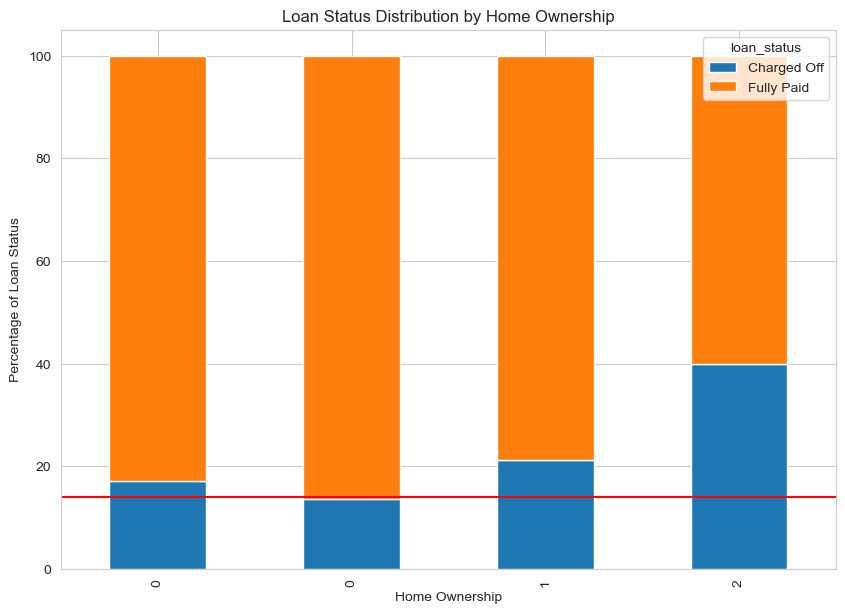

In [1651]:
groupedby_homeownership = loan_raw[['pub_rec_bankruptcies','loan_status']].groupby("pub_rec_bankruptcies")["loan_status"].value_counts(normalize = True).mul(100).unstack()
groupedby_term = loan_raw[['pub_rec_bankruptcies','loan_status']].groupby("pub_rec_bankruptcies")["loan_status"].value_counts(normalize = True).mul(100)
ax = groupedby_homeownership.plot(kind='bar', stacked=True, figsize=(10, 7))

ax.set_xlabel('Home Ownership')
ax.set_ylabel('Percentage of Loan Status')
ax.set_title('Loan Status Distribution by Home Ownership')

ax.axhline(y = charged_off_loan_percentage, color='red')